<table width="100%"><tr style="background-color:white;">
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="../images/QWorld.png"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://www.classiq.io/" target="_blank">
            <img src="../images/classiq-logo.svg"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->    
    <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
         prepared by Rishi Tiwari
    </td>    
</tr></table>

In [3]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/GI7qzMd6tpk", width=560, height=315)

# **Oracle in Quantum Algorithms**

Imagine a magical machine that takes your queries as input and always gives correct answers as output. Since you are completely unaware of its internal working mechanism, it's like a black box for you.

Similarly, in the context of quantum computing, we have black box circuits called Oracle. We are not aware of the internal gate arrangement but for a given input query, we can trust the output.

Oracles are widely used in quantum algorithms, such as the Deutsch-Jozsa and Grover's algorithms. The first algorithm that we will explore in the upcoming sections is the Deutsch algorithm. So, let's take a look at the oracle used there before jumping to the algorithm itself.

### **What Does Oracle Looks Like?**




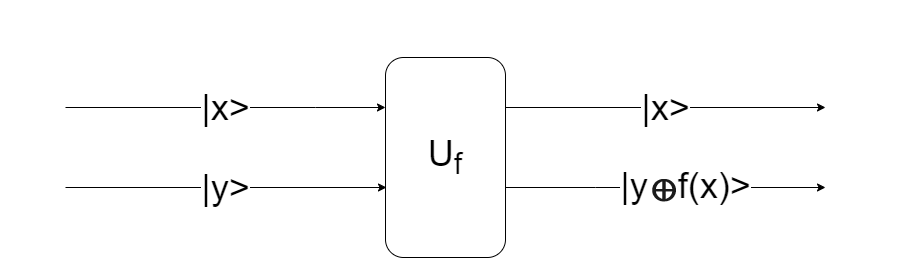


As illustrated in the above diagram, an oracle circuit takes two inputs: ∣x⟩ and ∣y⟩. Where ∣x⟩ is the primary set of qubits, representing the main input to the oracle. On the other hand, ∣y⟩ is the auxiliary qubit (also known as helper or ancilla qubit).

Function f(x) in oracle determines how insputs are transformed.

The output of the oracle includes unchanged input ∣x⟩  and the exclusive OR (XOR) of ∣y⟩ with the function value f(x).

ie. $$
|x\rangle|y\rangle \xrightarrow{U_f} |x\rangle|y \oplus f(x)\rangle
$$


**Why Oracle Looks This Weird?**

Now you might be wondering why to use ancilla qubits. Why input is coming as it is as output? Why f(x) is reflecting as XOR of ancilla? Why can't we just give input and take output from Oracle?

The answers to these questions lie in the fundamental nature of quantum mechanics, particularly its reversible characteristic. To maintain the reversibility of quantum circuits, we make these mathematical arrangements.
Check out this video for in-depth understanding:- https://www.youtube.com/watch?v=3TpOO63qLYM


# **Implementing Oracle in Classiq Python SDK**

We will create an arithmetic oracle that takes a set of two qubits as input, along with auxiliary qubits. Additionally, we will specify an expression related to the input qubits, which the oracle will validate.

If the expression is evaluated as true, the result after execution will be 1. However, if the expression is evaluated as false, the result will be 0.


Step 1:- Import necessary libraries:-

In [ ]:
from classiq import Model, RegisterUserInput, synthesize, show
from classiq.builtin_functions import StatePreparation, Arithmetic

Step2:- Do state preparation for qubits:-

In [ ]:
model = Model()

prob_a = [1,0]
prob_b = [0,1]

sp_a = StatePreparation(
    probabilities=prob_a, error_metric={"KL": {"upper_bound": 0.01}}
)
sp_b = StatePreparation(
    probabilities=prob_b, error_metric={"KL": {"upper_bound": 0.01}}
)

a = model.StatePreparation(params=sp_a)
b = model.StatePreparation(params=sp_b)


Step3:- Create arithmetic expression and specify input/output wires. Then synthesize the circuit:-

In [ ]:
params = Arithmetic(
    expression="a + b == 1",
    definitions=dict(
        a=RegisterUserInput(size=1),
        b=RegisterUserInput(size=1),
    ),
    uncomputation_method="optimized",
)


out=model.Arithmetic(params, in_wires={"a": a['OUT'], "b": b['OUT']})
model.set_outputs({ "result": out["expression_result"]})


qprog = synthesize(model.get_model())
show(qprog)

Step 4:- Open circuit in new browser tab and analyze it.

**Observations:-**
* There are 2 input qubits and 2 ancilla qubits.
* To maintain circuit reversibility, we are using arithmetic_adder two times.
* Ancilla qubit is XORed with the output of the first adder. This is from where |y⊕f(x)⟩ comes in the picture.
* At the output side, the actual boolean result of expression is stored in the ancilla qubit. Qubits used for input came out as it is without any change.


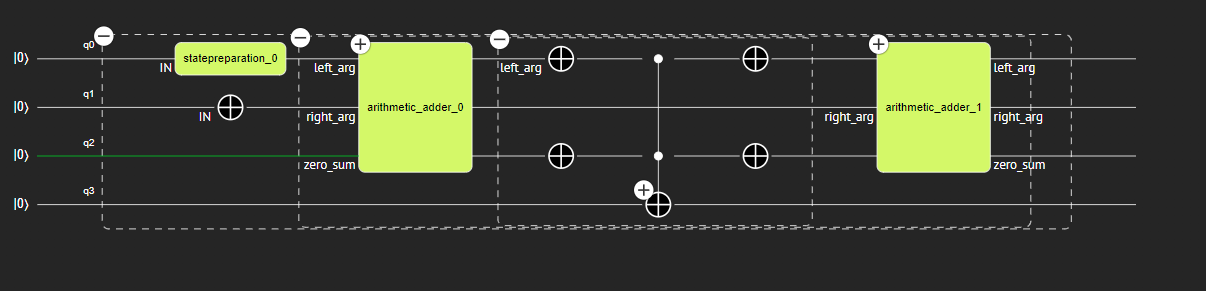

Step 5:- Execute the circuit on aer_simulator or qasm_simulator.

Expression will evaluate to true and result will be 1.

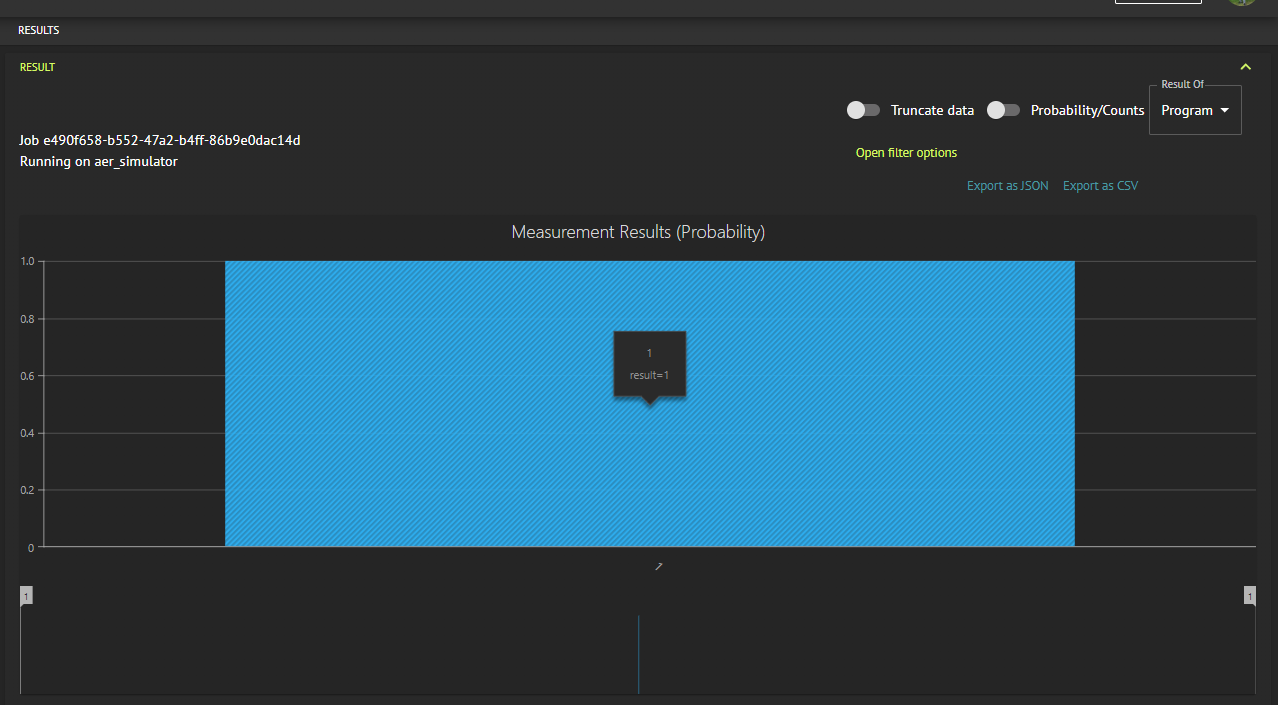



---


---



---



---




# **TASK #1**

Modify above code to get result true for  expression:-
1. a+b == 0
2. a-b == 0
3. a+b == 2

Play with code below:-

In [ ]:
from classiq import Model, RegisterUserInput, synthesize, show
from classiq.builtin_functions import StatePreparation, Arithmetic

model = Model()

prob_a = # Mention probability of state here
prob_b = # Mention probability of state here

sp_a = StatePreparation(
    probabilities=prob_a, error_metric={"KL": {"upper_bound": 0.01}}
)
sp_b = StatePreparation(
    probabilities=prob_b, error_metric={"KL": {"upper_bound": 0.01}}
)

a = model.StatePreparation(params=sp_a)
b = model.StatePreparation(params=sp_b)



params = Arithmetic(
    expression= # Specify expressions here
    ,definitions=dict(
        a=RegisterUserInput(size=1),
        b=RegisterUserInput(size=1),
    ),
    uncomputation_method="optimized",
)


out=model.Arithmetic(params, in_wires={"a": a['OUT'], "b": b['OUT']})
model.set_outputs({ "result": out["expression_result"]})


qprog = synthesize(model.get_model())
show(qprog)

# **TASK #2**

Modify above code to get result true for  expression:-
* a+b == 9


In [ ]:
from classiq import Model, RegisterUserInput, synthesize, show
from classiq.builtin_functions import StatePreparation, Arithmetic

model = Model()

prob_a = # Mention probability of state here
prob_b = # Mention probability of state here

sp_a = StatePreparation(
    probabilities=prob_a, error_metric={"KL": {"upper_bound": 0.01}}
)
sp_b = StatePreparation(
    probabilities=prob_b, error_metric={"KL": {"upper_bound": 0.01}}
)
a = model.StatePreparation(params=sp_a)
b = model.StatePreparation(params=sp_b)



params = Arithmetic(
    expression="a + b == 9",
    definitions=dict(
        a=RegisterUserInput(size=3),
        b=RegisterUserInput(size=3),
    ),
    uncomputation_method="optimized",
)


out=model.Arithmetic(params, in_wires={"a": a['OUT'], "b": b['OUT']})
model.set_outputs({ "result": out["expression_result"]})


qprog = synthesize(model.get_model())
show(qprog)